# Import Libraries

In [1]:
# import necessary libraries: 

# Basic imports
import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
from PIL import Image

# Preprocessing imports
from tensorflow.keras.utils import to_categorical, plot_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator


# Model Building imports
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers, Input, regularizers


# Visualization imports 
# from sklearn.metrics import ConfusionMatrixDisplay

# Load Mnist
# from keras.datasets import mnist

# Load CIFAR-10 dataset
# from tensorflow.keras.datasets import cifar10


# Part 1: Preprocessing

In [ ]:
# Example of loading existing datasets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
# Modifying dimensions 
np.expand_dims()
np.squeeze()
# example code: 


In [ ]:
# Initialise an image generator object
generator = ImageDataGenerator(rescale=1./255)

# Initialising number of data images
num_data = len(os.listdir('data/pavlos') + 
               os.listdir('data/not_pavlos'))

# Read the image data from the directory using the generator object
# This method automatically loads everything from the directory according to their file name and classification 
img_generator = generator.flow_from_directory(directory="data", color_mode='rgb', seed=1,
                                    batch_size=16, target_size=(150, 150), class_mode='binary')

# Print the target size i.e. the total dataset size
TARGET_SIZE = img_generator.target_size
print(f'Generator produces images of size {TARGET_SIZE} (with 3 color channels)')

# Print the batch size
BATCH_SIZE = img_generator.batch_size
print(f'Images are generated in batches of size {BATCH_SIZE}')

# Part II: Building and Compiling the Model

## Dense MLP

In [ ]:
# Dense layers only 

model_2 = models.Sequential(name='Dense')
model_2.add(layers.Dense(100,  activation='tanh', input_shape=(1,)))
model_2.add(layers.Dense(100,  activation='relu'))
model_2.add(layers.Dense(100,  activation='relu'))
model_2.add(layers.Dense(100,  activation='relu'))
model_2.add(layers.Dense(100,  activation='relu'))
# Add the output layer with one neuron 
model_2.add(layers.Dense(1,  activation='linear'))

# View the model summary
model_2.summary()

## CNN Layer

In [ ]:
model = Sequential()
# Your code here
model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D((2,2),strides=2))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(64,(3,3),padding='valid',activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPooling2D((2,2),strides=2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
# Dropout
model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))

# 
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

# View a summary of your model to see if the architecture is correct
model.summary()

## Regularization methdos: 

In [ ]:
# L1,L2 regularization
l1 = regularizers.L1(l1=0.1)
model.add(Dense(n_hidden,activation='tanh',kernel_regularizer=l1))

# Dropout
model.add(Dropout(0.2))
# Batch normalization
model.add(tf.keras.layers.BatchNormalization())

In [ ]:
# Early stopping
callbacks = EarlyStopping(monitor='val_accuracy',patience=20,restore_best_weights=True)
history = model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,validation_split=0.2,callbacks=callbacks)

In [ ]:
# Data Augmentation
datagen = ImageDataGenerator(rescale=1./255,
                             width_shift_range=.1,
                             height_shift_range=.1,
                             rotation_range=20,
                             zoom_range=0.3,
                             validation_split=0.2)
train_generator = datagen.flow(X_train,y_train,batch_size=32,subset='training')
validation_generator = datagen.flow(X_train,y_train,batch_size=32,subset='validation')


## Functional API

In [ ]:
# Two imput layers
input1 = keras.Input(shape=(3,),name='layer1')
input2 = keras.Input(shape=(3,),name='layer2')
# Concatenate the input layers 
input_layer = tf.keras.layers.Concatenate(axis=1)([input1, input2])
# pass them through dense layers and then an output layer using keras.layers.concatenate()
dense1 = layers.Dense(16,activation='elu')(input_layer)
dense2 = layers.Dense(8,activation='elu')(dense1)
output = layers.Dense(1)(dense2)
# Building the model
model = keras.Model(
    inputs=[input1,input2],
    outputs=output
)


# Single input layer with dropout
input_layer = Input(shape=(28,28))
flatten_layer = tf.keras.layers.Flatten()(input_layer)
regdense1 = Dense(200,activation='relu')(flatten_layer)
dropout1 = tf.keras.layers.Dropout(0.4)(regdense1)
regdense2 = Dense(200,activation='relu')(dropout1)
dropout2 = tf.keras.layers.Dropout(0.4)(regdense2)
dense3 = Dense(200,activation='relu')(dropout2)
output_layer = Dense(1,activation='sigmoid')(dense3)

## Part II: Fitting the model

MLP fit

In [ ]:
# Normal fitting method
history = model.fit(x=X_train,y=y_train,batch_size=10,epochs=1500,validation_split=0.2,callbacks=callback)

# Fitting the data from generator.flow_from_directory()
FFNN_history = FFNN.fit(
        img_generator,
        steps_per_epoch=num_data// BATCH_SIZE,
        epochs=20, shuffle=False, workers=0,
        validation_data=img_generator,
        validation_steps=num_data*0.25// BATCH_SIZE)

CNN fit

In [ ]:
# Without data augmentation
history_2 = model_2.fit(x=x_train,y=y_train,batch_size=10,epochs=1500,validation_split=0.2,callbacks=callback)
# Data augmentation
history = model.fit(train_generator, epochs=1000, 
                            batch_size=64, callbacks=callbacks, validation_data=validation_generator)

# Part III: Evaluating the model

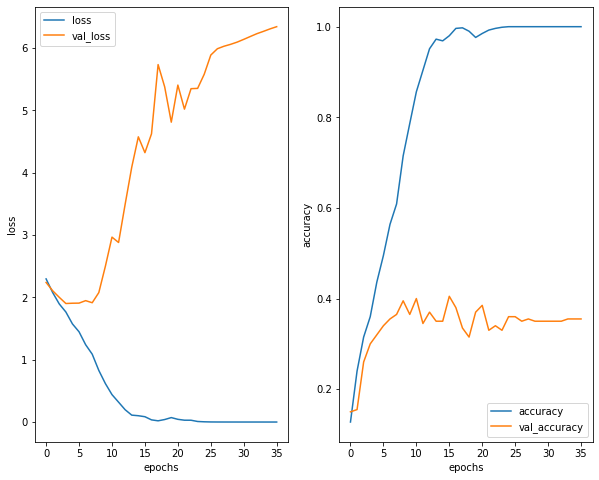

In [ ]:
# Plotting the following:
# - Training loss
# - Validation loss
# - Training accuracy 
# - Validation accuracy

fig,ax = plt.subplots(1,2,figsize=(10,8))
ax[0].plot(history.history['loss'],label='loss')
ax[0].plot(history.history['val_loss'],label='val_loss')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='accuracy')
ax[1].plot(history.history['val_accuracy'],label='val_accuracy')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
ax[1].legend()

